# Зачет 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from statsmodels.iolib.summary2 import summary_params, summary_col
import seaborn as sns

# Задание 1

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv")


In [4]:
data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


# Задание 2

# Спецификация

$$
sleep=\beta_0+\beta_1age+\beta_2educ+\beta_3totwrk+\beta_4black+u
$$

In [5]:
mod2_1 = smf.ols("sleep ~ age+educ+totwrk+black", data=data).fit()
mod2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     22.67
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.25e-17
Time:                        10:46:03   Log-Likelihood:                -5262.6
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     701   BIC:                         1.056e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3650.0285    112.946     32.317      0.000    3428.276    3871.781
age            2.0957      1.450      1.446      0.149      -0.751       4.942
educ         -11.3866      5.891     -1.933      0.054     -22.952       0.179
totwrk        -0.1489      0.017     -8.913      0.000      -0.182      -0.116
black        -70.2554     72.969     -0.963      0.336    -213.519      73.008
==============================================================================
Omnibus:                       67.917   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.538
Skew:                          -0.491   Prob(JB):                     2.30e-40
Kurtosis:                       5.289   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Задание 3 

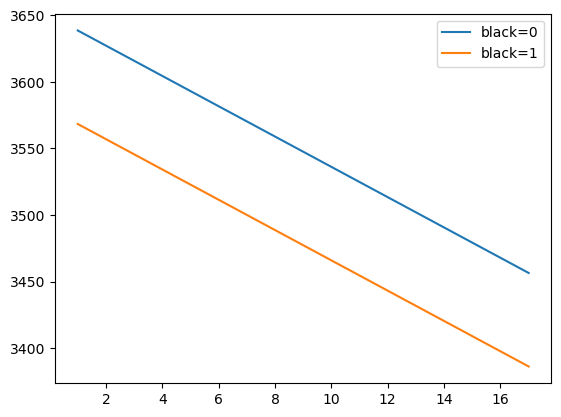

In [30]:
mod3_1 = smf.ols("sleep ~ age+educ+totwrk+black", data=data).fit()
x = np.arange(1,18, 1)
y_black0 = 3650.0285 -11.3866*x
y_black1 = 3650.0285 -11.3866*x-70.2554
plt.plot(x, y_black0, label='black=0')
plt.plot(x, y_black1, label='black=1')
plt.legend()

# Задание 4

# Спецификация

$$
\log sleep=\beta_0+\beta_1age+\beta_2educ+\beta_3totwrk+\beta_4black+\beta_5age^2+u
$$

Добавим в регрессию квадрат возраста, а вместо продолжительности сна будем использовать логарифм продолжительности сна

In [7]:
mod4_1 = smf.ols("np.log(sleep) ~ age+agesq+educ+totwrk+black", data=data).fit()
mod4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(sleep)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     16.13
Date:                Wed, 24 May 2023   Prob (F-statistic):           4.53e-15
Time:                        10:47:43   Log-Likelihood:                 372.91
No. Observations:                 706   AIC:                            -733.8
Df Residuals:                     700   BIC:                            -706.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2252      0.081    101.946      0.000       8.067       8.384
age           -0.0014      0.004     -0.356      0.722      -0.009       0.006
agesq       2.685e-05   4.59e-05      0.584      0.559   -6.34e-05       0.000
educ          -0.0026      0.002     -1.278      0.202      -0.007       0.001
totwrk     -4.757e-05   5.77e-06     -8.248      0.000   -5.89e-05   -3.62e-05
black         -0.0226      0.025     -0.905      0.366      -0.072       0.026
==============================================================================
Omnibus:                      408.825   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7959.168
Skew:                          -2.184   Prob(JB):                         0.00
Kurtosis:                      18.858   Cond. No.                     4.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Скорректированный R квадрат уменьшился, что может говорить об ухудшении качества модели. Однако AIC и BIC также уменьшились, что может говорить об улучшении. Выводы неоднозначные.

# Задание 5

In [8]:
mod5_1 = smf.ols("sleep ~ age+educ+totwrk+black", data=data).fit()
mod5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     22.67
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.25e-17
Time:                        10:49:05   Log-Likelihood:                -5262.6
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     701   BIC:                         1.056e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3650.0285    112.946     32.317      0.000    3428.276    3871.781
age            2.0957      1.450      1.446      0.149      -0.751       4.942
educ         -11.3866      5.891     -1.933      0.054     -22.952       0.179
totwrk        -0.1489      0.017     -8.913      0.000      -0.182      -0.116
black        -70.2554     72.969     -0.963      0.336    -213.519      73.008
==============================================================================
Omnibus:                       67.917   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.538
Skew:                          -0.491   Prob(JB):                     2.30e-40
Kurtosis:                       5.289   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

На уровне значимости в 1%, значимы только константа и коэффициент при totwrk. Не значимы коэффициенты при age, black и educ.

# Задание 6

Константа не интерпретируется. Интерпретация коэффициента при totwrk следующая: при прочих равных, в среднем, увеличение занятости на одну минуту в неделю связано с уменьшением продолжительности сна на 0.1489 минут в неделю.

# Задание 7

Спрогнозируем значения для первых трёх наблюдений

In [10]:
mod7_1 = smf.ols("sleep ~ age+educ+totwrk+black", data=data).fit()
mod7_1.predict(data.iloc[:3])

0    3068.681679
1    2808.320454
2    3129.635656
dtype: float64

Истинные значения равны

In [28]:
data.iloc[:3]['sleep']

0    3113
1    2920
2    2670
Name: sleep, dtype: int64

# Задание 8

Вычислим RSS и TSS

In [18]:
mod8_1 = smf.ols("sleep ~ age+educ+totwrk+black", data=data).fit()
RSS = sum(mod8_1.resid**2)
TSS = sum((data.sleep-np.mean(data.sleep))**2)

Следовательно R^2 равен

In [19]:
R2 = (TSS-RSS)/TSS
R2

0.11453490614898734

И стандартная ошибка регрессии равна

In [26]:
from math import sqrt
ser = sqrt(RSS/(len(data.index-4-1)))
ser

417.89302588036236

# Задание 9

Исправленный коэффициент R^2 вычисляется следующим образом

In [29]:
n = len(data.index)
k = 4
R2adj = 1- (1-R2)*(n-1)/(n-k-1)
R2adj

0.10948232358778331